In [41]:
import numpy as np

In [44]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [81]:
# Read the uploaded file into a list of lines
with open('cs_sentences_1000.txt', 'r', encoding='utf-8') as f:
    corpus = f.readlines()

print("Sample text:\n", "".join(corpus[:10]))  # preview first 10 lines

Sample text:
 Databases requires understanding of healthcare systems.
Cybersecurity is related to search engines.
Data science enables recommendation systems.
Cryptography is critical for robotics systems.
Cybersecurity supports robotics systems.
Natural language processing helps in solving e-commerce.
Machine learning simplifies smart cities.
Reinforcement learning is transforming e-commerce.
Software engineering is widely used in social networks.
Cybersecurity is transforming scientific research.



In [82]:
corpus = [line.strip() for line in corpus if line.strip() != '']
print("Number of non-empty lines:", len(corpus))


Number of non-empty lines: 1000


In [83]:
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
word_index=tokenizer.word_index


In [75]:
word_index

{'<OOV>': 1,
 'e': 2,
 'i': 3,
 's': 4,
 'n': 5,
 't': 6,
 'o': 7,
 'a': 8,
 'r': 9,
 'c': 10,
 'l': 11,
 'g': 12,
 'm': 13,
 'u': 14,
 'p': 15,
 'd': 16,
 'h': 17,
 'f': 18,
 'b': 19,
 'y': 20,
 'w': 21,
 'v': 22,
 'k': 23,
 'z': 24,
 'q': 25}

In [84]:
input_sequences = []

for line in corpus:
    # Convert the line to a sequence of integers
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Generate n-gram sequences
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

print("Number of input sequences:", len(input_sequences))


Number of input sequences: 5358


In [85]:
input_sequences

[[56, 38],
 [56, 38, 39],
 [56, 38, 39, 4],
 [56, 38, 39, 4, 19],
 [56, 38, 39, 4, 19, 3],
 [96, 2],
 [96, 2, 36],
 [96, 2, 36, 13],
 [96, 2, 36, 13, 49],
 [96, 2, 36, 13, 49, 50],
 [6, 97],
 [6, 97, 21],
 [6, 97, 21, 69],
 [6, 97, 21, 69, 3],
 [83, 2],
 [83, 2, 37],
 [83, 2, 37, 9],
 [83, 2, 37, 9, 12],
 [83, 2, 37, 9, 12, 3],
 [96, 40],
 [96, 40, 12],
 [96, 40, 12, 3],
 [16, 74],
 [16, 74, 75],
 [16, 74, 75, 22],
 [16, 74, 75, 22, 5],
 [16, 74, 75, 22, 5, 23],
 [16, 74, 75, 22, 5, 23, 57],
 [16, 74, 75, 22, 5, 23, 57, 58],
 [70, 7],
 [70, 7, 24],
 [70, 7, 24, 71],
 [70, 7, 24, 71, 72],
 [63, 7],
 [63, 7, 2],
 [63, 7, 2, 53],
 [63, 7, 2, 53, 57],
 [63, 7, 2, 53, 57, 58],
 [99, 100],
 [99, 100, 2],
 [99, 100, 2, 87],
 [99, 100, 2, 87, 88],
 [99, 100, 2, 87, 88, 5],
 [99, 100, 2, 87, 88, 5, 76],
 [99, 100, 2, 87, 88, 5, 76, 18],
 [96, 2],
 [96, 2, 53],
 [96, 2, 53, 64],
 [96, 2, 53, 64, 65],
 [84, 2],
 [84, 2, 87],
 [84, 2, 87, 88],
 [84, 2, 87, 88, 5],
 [84, 2, 87, 88, 5, 14],
 [84, 2,

In [86]:
max_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding="pre")


In [8]:
input_sequences

array([[  0,   0,   0, ...,   0,   3,  10],
       [  0,   0,   0, ...,   3,  10,  17],
       [  0,   0,   0, ...,  10,  17,   5],
       ...,
       [  0,   0,   0, ..., 124, 125,   9],
       [  0,   0,   4, ..., 125,   9,   4],
       [  0,   4, 124, ...,   9,   4, 126]], dtype=int32)

In [89]:
import builtins
globals()['len'] = builtins.len

word_index_dict = tokenizer.word_index  # Changed variable name
total_words = len(word_index_dict)      # Use built-in len()

In [87]:
total_words

25

In [91]:
from tensorflow.keras.utils import to_categorical

X = input_sequences[:, :-1]
y = input_sequences[:, -1]

print("Max index in y:", y.max())   # Debug check
print("Total words:", total_words)  # Debug check

# ✅ Use max(y) + 1 instead of total_words (safer)
y = to_categorical(y, num_classes=y.max() + 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Max index in y: 100
Total words: 100
Shape of X: (5358, 9)
Shape of y: (5358, 101)


In [92]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (5358, 9)
Shape of y: (5358, 101)


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense


In [95]:
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [96]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [97]:
from tensorflow.keras.utils import to_categorical

X = input_sequences[:, :-1]
y = input_sequences[:, -1]

num_classes = y.max() + 1   # ensure consistency
y = to_categorical(y, num_classes=num_classes)

print("Final num_classes:", num_classes)

# Model
model = Sequential()
model.add(Embedding(num_classes, 64, input_length=max_len-1))
model.add(LSTM(100))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X, y, epochs=100, verbose=1)


Final num_classes: 101
Epoch 1/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1074 - loss: 4.2879
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2677 - loss: 3.1672
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5396 - loss: 1.9585
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6262 - loss: 1.3964
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6249 - loss: 1.2676
Epoch 6/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6361 - loss: 1.1729
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6246 - loss: 1.1755
Epoch 8/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6291 - loss: 1.1722
Epoch 9/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6271 - loss: 1.1529
Epoch 10/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6273 - loss: 1.1522
Epoch 11/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6282 - loss: 1.1513
Epoch 12/100
168/1

In [107]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Step 1: Define the model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100,input_length=max_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

# Step 2: Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Step 3: Train the model
# Early stopping to prevent overfitting


history = model.fit(X, y, epochs=50, batch_size=64, verbose=1)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 101), output.shape=(None, 100)

In [98]:
def predict_next_word(seed_text, n_words):
    for _ in range(n_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding="pre")
        predicted = np.argmax(model.predict(token_list, verbose=0))
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text

# ===============================
# STEP 7: Try predictions
# ===============================
print(predict_next_word("I love", 3))
print(predict_next_word("deep learning", 2))
print(predict_next_word("machine", 3))


I love is critical for
deep learning is revolutionizing
machine learning is the


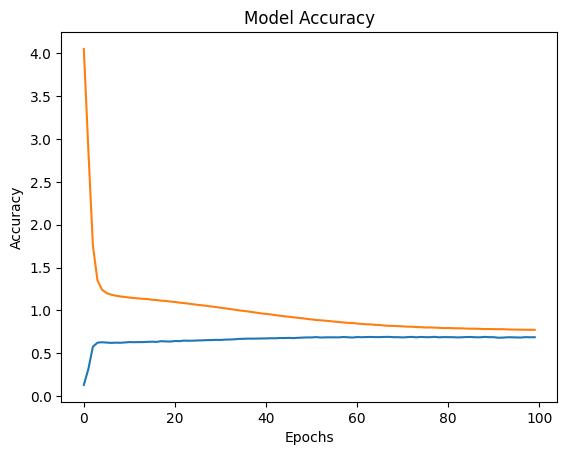

In [99]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [100]:
# Save
model.save("next_word_model1.h5")   # or .keras format

# Load later
from tensorflow.keras.models import load_model
loaded_model = load_model("next_word_model1.h5")


In [101]:
# Save trained LSTM model
model.save("next_word_model1.keras")

# Save tokenizer
import pickle
with open("tokenizer1.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
